# Tutorial on Bilevel Optimization
## with Neural Implicit Differentiation

In [1]:
import numpy as np
from BilevelProblem.BilevelProblem import BilevelProblem

We first look at a simple one-dimensional example with the outer objective:
$$
  f(x, y^*(x))=x^2+y^*(x)^2
$$
and the inner objective:
$$
  g(x, y)=2xy+y^2
$$

In [2]:
fo = lambda x, y: x**2+y**2
fi = lambda x, y: 2*x*y+y**2
# Gradient wrt x of f
og1 = lambda x, y: 2*x
# Gradient wrt y of f
og2 = lambda x, y: 2*y
# Gradient wrt y of gradient wrt y of g
ig22 = lambda x, y: 2
# Gradient wrt x of gradient wrt y of g
ig12 = lambda x, y: 2

We now can instanciate the bilevel problem using the class *BilevelProblem.py*

In [3]:

bp = BilevelProblem(outer_objective=fo, inner_objective=fi)
# Optimize using classical implicit differention.
x_opt, iters, n_iters = bp.optimize(method="implicit_diff", x0=1.7, y0=0, outer_grad1=og1, outer_grad2=og2, inner_grad22=ig22, inner_grad12=ig12, maxiter=20)
print("Argmin of the outer objective:", x_opt)
print("Number of iterations:", n_iters)

Argmin of the outer objective: 6.215469348107057e-05
Number of iterations: 20


Since we are in a 2D setting we can vizualize the iterations.

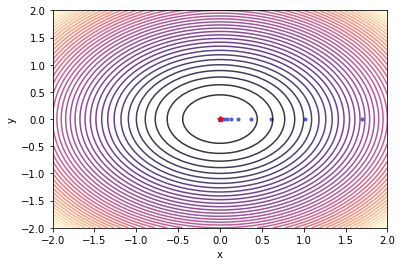

In [4]:
# Visualize iterations.
bp.visualize(iters, plot_x_lim=2, plot_y_lim=2)

We now  work with the linear regression example where $F$ is a $m\times n$ feature matrix (every row is a feature vector of dimension $n$) and $l$ is an $m$ dimensional label vector (every member is a label for a corresponding feature vector). We have the outer objective:
$$
  f(x, y^*(x)) = \lVert Fy^*(x)-l \rVert_2^2 + x \lVert y^*(x) \rVert_2^2
$$
and the inner objective:
$$
  g(x, y) = \lVert Fy-l \rVert_2^2 + x \lVert y \rVert_2^2
$$

In [ ]:
n=2
m=3
F=np.ones((m,n))
l=np.ones(n)

In [ ]:
fo = lambda x, y: (1/2)*np.sum(F@y-l)**2+x*np.sum(y)**2
fi = fo
# Gradient wrt x of f
og1 = lambda x, y: np.sum(y)**2
# Gradient wrt y of f
og2 = lambda x, y: (F.T@(F@y-l))+x*2*y
# Gradient wrt y of gradient wrt y of g
ig22 = lambda x, y: (F.T@F)+x*2*np.identity(m)
# Gradient wrt x of gradient wrt y of g
ig12 = lambda x, y: 2*y

We now can instanciate the bilevel problem where our goal is to recover the optimal parameter $x$ which controls the $L2$ regularization term in the linear regression objective and the inner objective function indicates that the recovered parameter vector $y$ is optimal.

In [ ]:

bp = BilevelProblem(outer_objective=fo, inner_objective=fi)
# Optimize using classical implicit differention.
x_opt, iters, n_iters = bp.optimize(method="implicit_diff", x0=1.7, y0=0, outer_grad1=og1, outer_grad2=og2, inner_grad22=ig22, inner_grad12=ig12, maxiter=20)
print("Argmin of the outer objective:", x_opt)
print("Number of iterations:", n_iters)